<a href="https://colab.research.google.com/github/omidmno2/stockMarketPrediction_DL/blob/main/Minoo_15x15_Technical_Analysis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Getting Data from GitHub
!wget --no-check-certificate \
    https://github.com/omidmno2/stockMarketPrediction_DL/raw/main/tse_en.csv \
    -o /tmp/tse_en.csv

In [2]:
# Import required libraries
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [51]:
# Select the desired symbol
df = pd.read_csv("tse_en.csv")
df[df.Symbol == "غپينو"]

,Date,Symbol,Name,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
2726,2009-01-13,غپينو,پارس‌ مينو,1179,1179,1179,1179,0,1179.0,1179.0,2,3000,3537000
3656,2009-01-25,غپينو,پارس‌ مينو,1179,1144,1144,1179,0,1144.0,1144.0,1,500,572000
5328,2009-02-11,غپينو,پارس‌ مينو,1179,1144,1144,1172,-7,1144.0,1144.0,7,10690,12229360
6484,2009-03-01,غپينو,پارس‌ مينو,1172,1000,1136,1115,-57,1000.0,1136.0,5,18005,20067984
6998,2009-03-08,غپينو,پارس‌ مينو,1115,1082,1082,1114,-1,1082.0,1082.0,1,1000,1082000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
817334,2021-06-22,غپينو,پارس‌ مينو,6290,6330,6350,6400,110,6150.0,6600.0,1658,12310666,78773286130
817949,2021-06-23,غپينو,پارس‌ مينو,6400,6500,6370,6350,-50,6270.0,6500.0,1136,7467755,47406121760
818214,2021-06-26,غپينو,پارس‌ مينو,6350,6400,6430,6410,60,6240.0,6580.0,1332,8061100,51644978160
818807,2021-06-27,غپينو,پارس‌ مينو,6410,6260,6200,6240,-170,6100.0,6440.0,1441,11783573,73543026570


In [71]:
# Data cleaning
data = df[df.Symbol == "غپينو"]
data.index = pd.to_datetime(data['Date'])
data = data.drop(columns=['Symbol', 'Name', 'Date']).dropna()
data = data.head(2110)

In [61]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

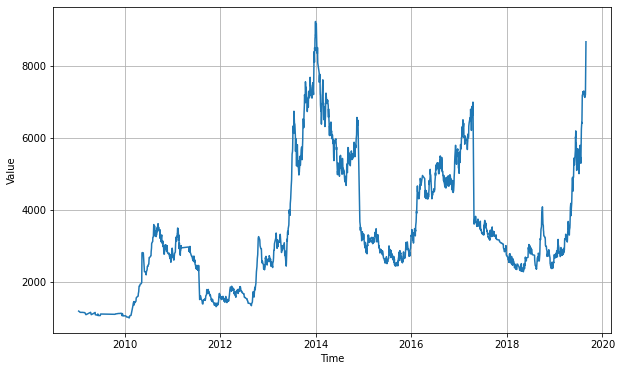

In [72]:
# Data plotting
series = np.array(data["Last"])
time = np.array(data.index)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [73]:
# Installing required libraries for Technical Analysis
!pip install ta
!pip install pandas_ta

  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=24eeb5e77e13255dde903fd172e6098be34cc92f81bfb3f68146eaea61cc97a7
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=8ba6a735a8333d852dc391dd12d43e10a569a7306aa506ee4fe5da298f1c3ca3
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [74]:
# Calculation of the mentioned indicators
import ta
#https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#volatility-indicators
#data = ta.add_all_ta_features(data, open="Open", high="High", low="Low", close="Last", volume="Volume")

import pandas_ta
#https://github.com/twopirllc/pandas-ta

#import talib
#https://github.com/mrjbq7/ta-lib
#https://ta-lib.org/function.html


# 1 - RSI - Relative Strength Index
rsi = pd.DataFrame()
for i in range(6, 21):
    indicator_rsi = ta.momentum.RSIIndicator(close=data.Last, window=i)
    string = "RSI_" + str(i) + "d"
    rsi[string] = indicator_rsi.rsi()


# 2 - Williams %R
williamsR = pd.DataFrame()
for i in range(6, 21):
    indicator_WilliamsR = ta.momentum.WilliamsRIndicator(high=data.High, low=data.Low, close=data.Last, lbp=i)
    string = "Williams %R_" + str(i) + "d"
    williamsR[string] = indicator_WilliamsR.williams_r()


# 3 - WMA - Weighted Moving Average
wma = pd.DataFrame()
for i in range(6, 21):
    indicator_wma = ta.trend.WMAIndicator(close=data.Last, window=i)
    string = "WMA_" + str(i) + "d"
    wma[string] = indicator_wma.wma()


# 4 - EMA - Exponential Moving Average
ema = pd.DataFrame()
for i in range(6, 21):
    indicator_ema = ta.trend.EMAIndicator(close=data.Last, window=i)
    string = "EMA_" + str(i) + "d"
    ema[string] = indicator_ema.ema_indicator()


# 5 - SMA - Simple Moving Average
sma = pd.DataFrame()
for i in range(6, 21):
    indicator_sma = ta.trend.SMAIndicator(close=data.Last, window=i)
    string = "SMA_" + str(i) + "d"
    sma[string] = indicator_sma.sma_indicator()


# 6 - HMA - Hull Exponential Moving Average
hma = pd.DataFrame()
for i in range(6, 21):
    string = "HMA_" + str(i) + "d"
    hma[string] = pandas_ta.hma(close=data.Last, length=i)


# 7 - Triple EMA - Triple Exponential Moving Average
tema = pd.DataFrame()
for i in range(6, 21):
    string = "Triple EMA_" + str(i) + "d"
    tema[string] = pandas_ta.tema(close=data.Last, length=i)


# 8 - CCI - Commodity Channel Index
cci = pd.DataFrame()
for i in range(6, 21):
    indicator_cci = ta.trend.CCIIndicator(high=data.High, low=data.Low, close=data.Last, window=i)
    string = "CCI_" + str(i) + "d"
    cci[string] = indicator_cci.cci()


# 9 - CMO - Chande Momentum Oscillator
cmo = pd.DataFrame()
for i in range(6, 21):
    string = "CMO_" + str(i) + "d"
    cmo[string] = pandas_ta.cmo(close=data.Last, length=i)


# 10 - MACD - Moving Average Convergence Divergence
macd = pd.DataFrame()
for i in range(6, 21):
    indicator_macd = ta.trend.MACD(close=data.Last, window_slow=26, window_fast=12, window_sign=9)
    string = "MACD_" + str(i) + "d"
    macd[string] = indicator_macd.macd()


# 11 - PPO - The Percentage Price Oscillator
ppo = pd.DataFrame()
for i in range(6, 21):
    indicator_ppo = ta.momentum.PercentagePriceOscillator(close=data.Last, window_slow=26, window_fast=12, window_sign=9)
    string = "PPO_" + str(i) + "d"
    ppo[string] = indicator_ppo.ppo()


# 12 - ROC - Rate of Change
roc = pd.DataFrame()
for i in range(6, 21):
    indicator_roc = ta.momentum.ROCIndicator(close=data.Last, window=i)
    string = "ROC_" + str(i) + "d"
    roc[string] = indicator_roc.roc()


# 13 - CMF - Chaikin Money Flow
cmf = pd.DataFrame()
for i in range(6, 21):
    string = "CMF_" + str(i) + "d"
    cmf[string] = pandas_ta.cmf(high=data.High, low=data.Low, close=data.Last, volume=data.Volume, open=data.Open, length=i)

    
# 14 - ADX - Average Directional Movement Index (ADX)
adx = pd.DataFrame()
for i in range(6, 21):
    string = "ADX_" + str(i) + "d"
    sec_string = "ADX_" + str(i)
    adx[string] = pandas_ta.adx(high=data.High, low=data.Low, close=data.Last, length=i)[sec_string]

    
# 15 - PSI - Parabolic Stop and Reverse (Parabolic SAR)
psi = pd.DataFrame()
for i in range(6, 21):
    indicator_psi = ta.trend.PSARIndicator(high=data.High, low=data.Low, close=data.Last)
    string = "PSI_" + str(i) + "d"
    psi[string] = indicator_psi.psar()

In [75]:
rsi = rsi[60:]
williamsR = williamsR[60:]
wma = wma[60:]
ema = ema[60:]
sma = sma[60:]
hma = hma[60:]
tema = tema[60:]
cci = cci[60:]
cmo = cmo[60:]
macd = macd[60:]
ppo = ppo[60:]
roc = roc[60:]
cmf = cmf[60:]
adx = adx[60:]
psi = psi[60:]

In [76]:
# 15x15 pixel image creation phase
pictures = list()
for i in range(0, len(rsi)):
    pic = pd.DataFrame(index=['6d', '7d', '8d', '9d', '10d', '11d', '12d', '13d', '14d', '15d', '16d', '17d', '18d', '19d', '20d'])
    pic["RSI"] = np.array(rsi[i:i+1].transpose())
    pic["Williams %R"] = np.array(williamsR[i:i+1].transpose())
    pic["WMA"] = np.array(wma[i:i+1].transpose())
    pic["EMA"] = np.array(ema[i:i+1].transpose())
    pic["SMA"] = np.array(sma[i:i+1].transpose())
    pic["HMA"] = np.array(hma[i:i+1].transpose())
    pic["Triple EMA"] = np.array(tema[i:i+1].transpose())
    pic["CCI"] = np.array(cci[i:i+1].transpose())
    pic["CMO"] = np.array(cmo[i:i+1].transpose())
    pic["MACD"] = np.array(macd[i:i+1].transpose())
    pic["PPO"] = np.array(ppo[i:i+1].transpose())
    pic["ROC"] = np.array(roc[i:i+1].transpose())
    pic["CMF"] = np.array(cmf[i:i+1].transpose())
    pic["ADX"] = np.array(adx[i:i+1].transpose())
    pic["PSI"] = np.array(psi[i:i+1].transpose())
    pictures.append(pic.transpose())

In [77]:
len(pictures)

2050

In [78]:
# Algorithm 1
# Labeling (Buy, Sell, Hold)

window_size = 11
counter = 0
bsh_labels = []

window_begin_idx=0
window_end_idx=0
window_middle_idx=0

min_idx=0
max_idx=0
number=0.0
mins=10000.0
maxs=0.0
while counter < len(data.Last):
    if counter > window_size:
        window_begin_idx = counter - window_size
        window_end_idx = window_begin_idx + window_size - 1
        window_middle_idx = (window_begin_idx + window_end_idx)//2
        for i in range(window_begin_idx, window_end_idx+1):
            number = data.Last[i]
            if number < mins:
                mins=number
                min_idx = np.where(data.Last==mins)[0][0]
            if number > maxs:
                maxs=number
                max_idx = np.where(data.Last==maxs)[0][0]
        if max_idx == window_middle_idx:
            bsh_labels.append(0) #SELL
        elif min_idx == window_middle_idx:
            bsh_labels.append(1) #BUY
        else:
            bsh_labels.append(2) #HOLD  
        mins = 10000.0
        maxs = 0.0
    counter+=1

In [79]:
len(bsh_labels)

2098

In [80]:
len(data.Last)

2110

In [81]:
len(data.Last) - len(bsh_labels)
# You should remove 6 rows from head and 6 rows from tail of data or actualy pictures.
# After checking, it was found that this difference is due to the fact that 6 lines from the top and 6 lines from the bottom have been removed.
# شش تای اول و شش تای آخر حذف میشوند موقع درست کردن لیبل

12

In [82]:
bsh_labels = bsh_labels[54:]
pictures = pictures[:-6]
print(len(bsh_labels))
print(len(pictures))

2044
2044


In [83]:
df = pd.DataFrame()
df['Last'] = data.Last[60:-6]
df['Label'] = bsh_labels
df.head()

,Last,Label
Date,,
2010-01-25,1007,2
2010-01-30,1007,2
2010-02-01,1007,2
2010-02-02,990,2
2010-02-03,988,1


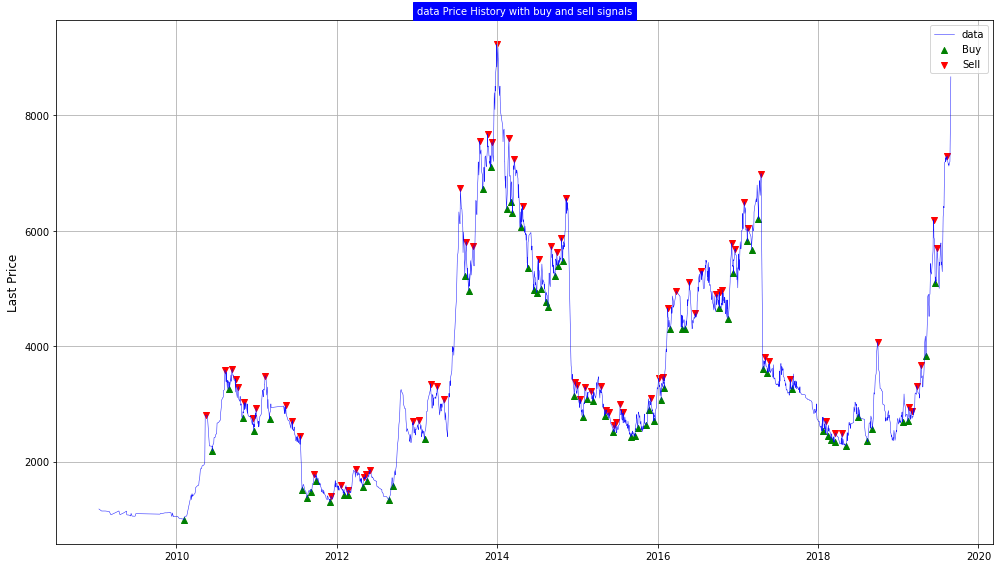

In [84]:
# Showing Buy and Sell strategy(Algorithm 1)
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['Last'], label='data',linewidth=0.5, color='blue', alpha = 0.9)
ax.scatter(df.loc[df.Label == 1].index, df.Last[df.Label == 1], label='Buy', marker='^', color='green', alpha=1)
ax.scatter(df.loc[df.Label == 0].index, df.Last[df.Label == 0], label='Sell', marker='v', color='red', alpha=1)
ax.set_title('data' + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_ylabel('Last Price' , fontsize=12)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

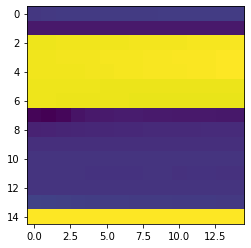

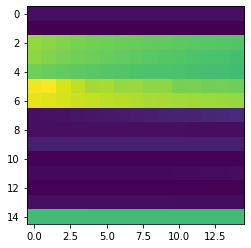

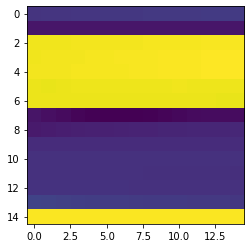

In [95]:
# 15×15 pixel labeled sample images after image creation phase for algorithm 1
plt.imshow(pictures[0], interpolation='nearest') # Hold
plt.show()
plt.imshow(pictures[47], interpolation='nearest') # Sell
plt.show()
plt.imshow(pictures[4], interpolation='nearest') # Buy
plt.show()

In [96]:
# Divide the data into training and validation data
split_time = 1800
y_train = bsh_labels[:split_time]
x_train = pictures[:split_time]
y_valid = bsh_labels[split_time:]
x_valid = pictures[split_time:]

In [97]:
y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

In [98]:
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_valid = tf.keras.utils.to_categorical(y_valid, 3)

In [99]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 128)         0         
                                                        

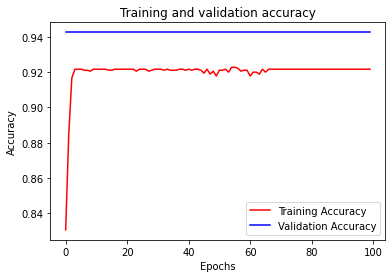

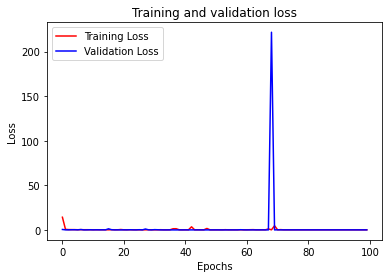

In [100]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [101]:
# Test another labaling method(different buy and sell strategy)

In [102]:
# SMA(Simple Moving Average) BUY and SELL Strategy

short_window = 40
long_window = 100

signals = pd.DataFrame(index=data.index)
signals['signal'] = 0.0

signals['short_mavg'] = data['Last'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = data['Last'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals

,signal,short_mavg,long_mavg,positions
Date,,,,
2009-01-13,0.0,1179.000000,1179.000000,NaN
2009-01-25,0.0,1161.500000,1161.500000,0.0
2009-02-11,0.0,1155.666667,1155.666667,0.0
2009-03-01,0.0,1150.750000,1150.750000,0.0
2009-03-08,0.0,1137.000000,1137.000000,0.0
...,...,...,...,...
2019-08-24,1.0,6259.225000,5069.510000,0.0
2019-08-25,1.0,6311.025000,5114.130000,0.0
2019-08-26,1.0,6365.225000,5161.160000,0.0


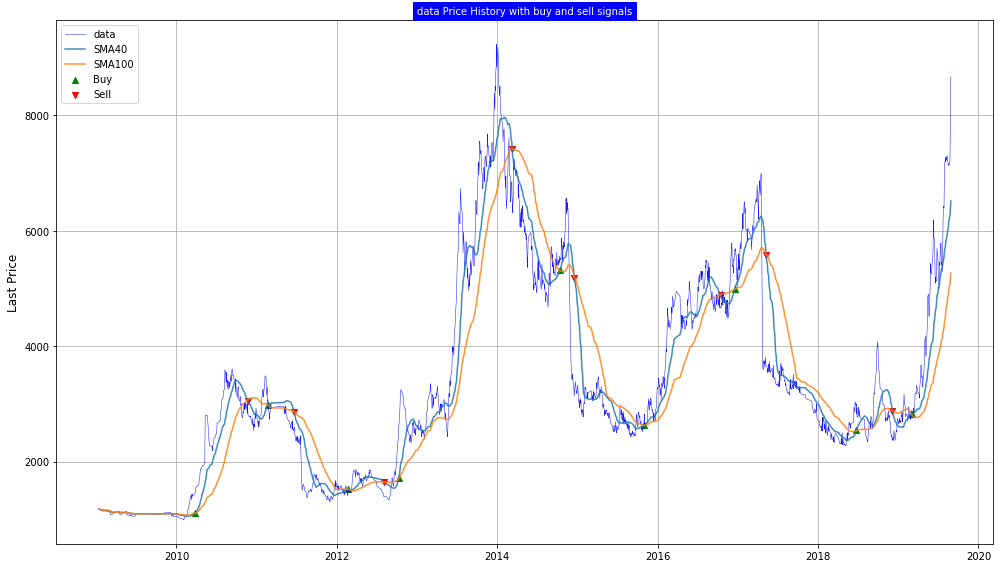

In [103]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['Last'] , label='data' ,linewidth=0.5, color='blue', alpha=0.9)
ax.plot(signals['short_mavg'], label='SMA40', alpha=0.85)
ax.plot(signals['long_mavg'], label='SMA100', alpha=0.85)
ax.scatter(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], label = 'Buy', marker='^', color='green', alpha=1)
ax.scatter(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], label = 'Sell', marker='v', color='red', alpha=1)
ax.set_title('data' + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_ylabel('Last Price', fontsize=12)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [104]:
bs_labels = signals.positions[60:-6]

In [105]:
len(bs_labels)

2044

In [106]:
len(pictures)

2044

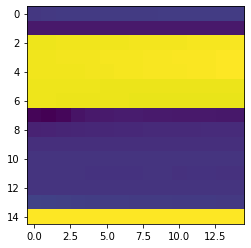

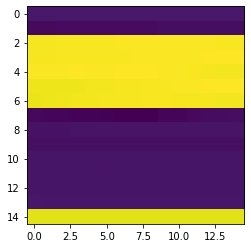

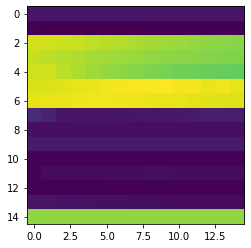

In [113]:
# 15×15 pixel labeled sample images after image creation phase for SMA buy and sell strategy
plt.imshow(pictures[0], interpolation='nearest') # Hold
plt.show()
plt.imshow(pictures[159], interpolation='nearest') # Sell
plt.show()
plt.imshow(pictures[18], interpolation='nearest') # Buy
plt.show()

In [114]:
# Divide the data into training and validation data
split_time = 2000
y_train = bs_labels[:split_time]
x_train = pictures[:split_time]
y_valid = bs_labels[split_time:]
x_valid = pictures[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_valid = tf.keras.utils.to_categorical(y_valid, 3)

In [115]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 128)         0         
                                                      

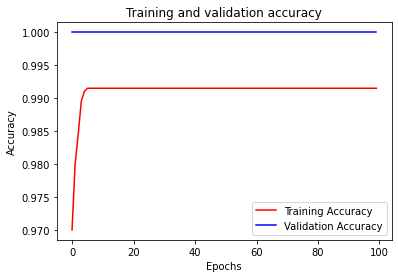

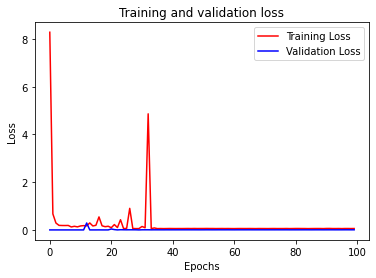

In [116]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [117]:
# Test Up and Down labeling method

In [118]:
data.head()

,Yesterday,Open,Last,Close,Close Changes,Low,High,Number Traded,Volume,Value Traded
Date,,,,,,,,,,
2009-01-13,1179,1179,1179,1179,0,1179.0,1179.0,2,3000,3537000
2009-01-25,1179,1144,1144,1179,0,1144.0,1144.0,1,500,572000
2009-02-11,1179,1144,1144,1172,-7,1144.0,1144.0,7,10690,12229360
2009-03-01,1172,1000,1136,1115,-57,1000.0,1136.0,5,18005,20067984
2009-03-08,1115,1082,1082,1114,-1,1082.0,1082.0,1,1000,1082000


In [119]:
# labeling Up or Down

ud_labels = []

for i in range(1, len(data.Last)):
    if data.Last[i] < data.Last[i-1]:
        ud_labels.append(0) # 0 = Down
    else:
        ud_labels.append(1) # 1 = Up
        
# This method miss first row from data, you should remove first row then train it

In [120]:
ud_labels = ud_labels[59:-6]
len(ud_labels)

2044

In [121]:
len(pictures)

2044

In [122]:
# Divide the data into training and validation data
split_time = 2000
y_train = ud_labels[:split_time]
x_train = pictures[:split_time]
y_valid = ud_labels[split_time:]
x_valid = pictures[split_time:]

y_train = np.array(y_train)
x_train = np.array(x_train)
y_valid = np.array(y_valid)
x_valid = np.array(x_valid)

#y_train = tf.keras.utils.to_categorical(y_train, 2)
#y_valid = tf.keras.utils.to_categorical(y_valid, 2)

In [123]:
# Create and train the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(15, 15, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='softmax')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 128)         73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 128)         0         
                                                      

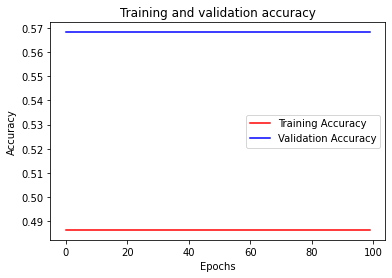

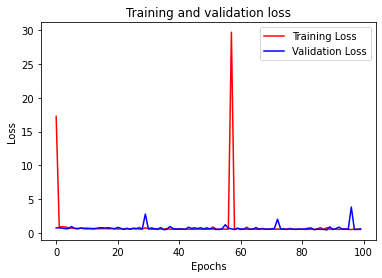

In [124]:
# Ploting accuracy and loss diagrams
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure().add_subplot(xlabel='Epochs', ylabel='Accuracy')
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.figure().add_subplot(xlabel='Epochs', ylabel='Loss')
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()